# Regression

회귀 : 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법  

여러 가지 회귀 중에서 선형 회귀가 가장 많이 사용됨.  
선형 회귀 : 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식.  

규제(Regularization) : 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서, 회귀 계수에 패널티 값을 적용하는 것.  
- 릿지(Ridge) : 선형 회귀에 L2 규제를 추가한 회귀 모델.  
                L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델.  
- 라쏘(Lasso) : 선형 회귀에 L1 규제를 적용한 방식.   
                L1 규제는 예측 영향력이 적은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것.  
                피처 선택 기능으로 불리기도 함.  
- 엘라스틱넷(ElasticNet) : L2,L1 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에서 사용됨.  
                L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정함.  
- 로지스틱 회귀(Logistic Regression) : 사실은 분류에 사용되는 선형 모델.  매우 강력한 분류 알고리즘.  
                일반적으로 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임.


## Import package

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

Gradient Descent :  
'점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서, 오류 값이 최소가 되는 W 파라미터를 구하는 방식.  
어떻게 보면 무식해 보이는 방법이지만, W 파라미터의 개수에 따라 매우 복잡해지는 고차원 방정시을 푸는 것보다 훨씬 더 직관적이고 빠르게
비용 함수가 최소가 되는 W 파라미터 값을 구할 수 있음.  

In [3]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [4]:
# W1과 W0를 업데이트 할 w1_update, w0_update를 반환.  
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    w0_factors = np.ones((N,1))
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [5]:
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for iter in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

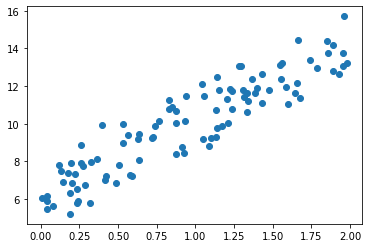

In [7]:
np.random.seed(0)
# y=4X+6을 근사 (w1=4, w0=6).
X = 2*np.random.rand(100,1)
y = 6 + 4*X+np.random.randn(100,1)

plt.scatter(X,y)

In [8]:
w1, w0 = gradient_descent_steps(X,y,iters=1000)
print(f'w1:{w1[0,0]:.3f}, w0:{w0[0,0]:1.3f}')
y_pred = w1[0,0] * X + w0
print(f'Gradient Descent Total Cost : {get_cost(y,y_pred):.4f}')

w1:4.022, w0:6.162
Gradient Descent Total Cost : 0.9935


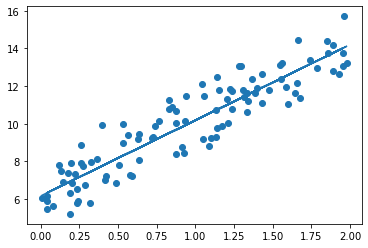

In [9]:
plt.scatter(X,y)
plt.plot(X, y_pred)

실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent)을 이용함.  
전체 X, y데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update를 계사하는 부분만 차이가 있음.

-----

## Load Data

사이킷런에 내장된 보스턴 주택 가격 데이터

- CRIM : 지역별 범죄 발생률  
- ZN : 25,000 평방피트를 초과하는 거주 지역의 비율  
- INDUS : 비상업 지역 넓이 비율  
- CHAS : 찰스강에 대한 더미 변수  
    - (강의 경계에 위치한 경우는 1, 아니면 0  
- NOX : 일산화질소 농도  
- RM : 방 개수  
- AGE : 1940년 이전에 건축된 소유 주택의 비율  
- DIS : 5개 주요 고용센터까지의 거리  
- RAD : 고속도로 접근 용이도 지수  
- TAX : 10,000 달러 당 재산세율  
- PTRAIO : town별 학생/교사 비율  
- B : town별 흑인의 비율  
- LSTAT : 하위계층 비율(%)  
- MEDV : 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [10]:
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

In [11]:
boston = load_boston()

In [13]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

In [14]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
df_boston['PRICE'] = boston.target

In [16]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [108]:
# df_boston.columns = ["INDEX", "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "PRICE"]
df_boston.to_csv('boston_house_price.csv', header=True, index=False)

In [17]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


=> non-null, all data is float types

-----

## EDA

#### seaborn - regplot() : X, Y 축 값의 산점도와 함께 선형 회귀 직선을 그려줌

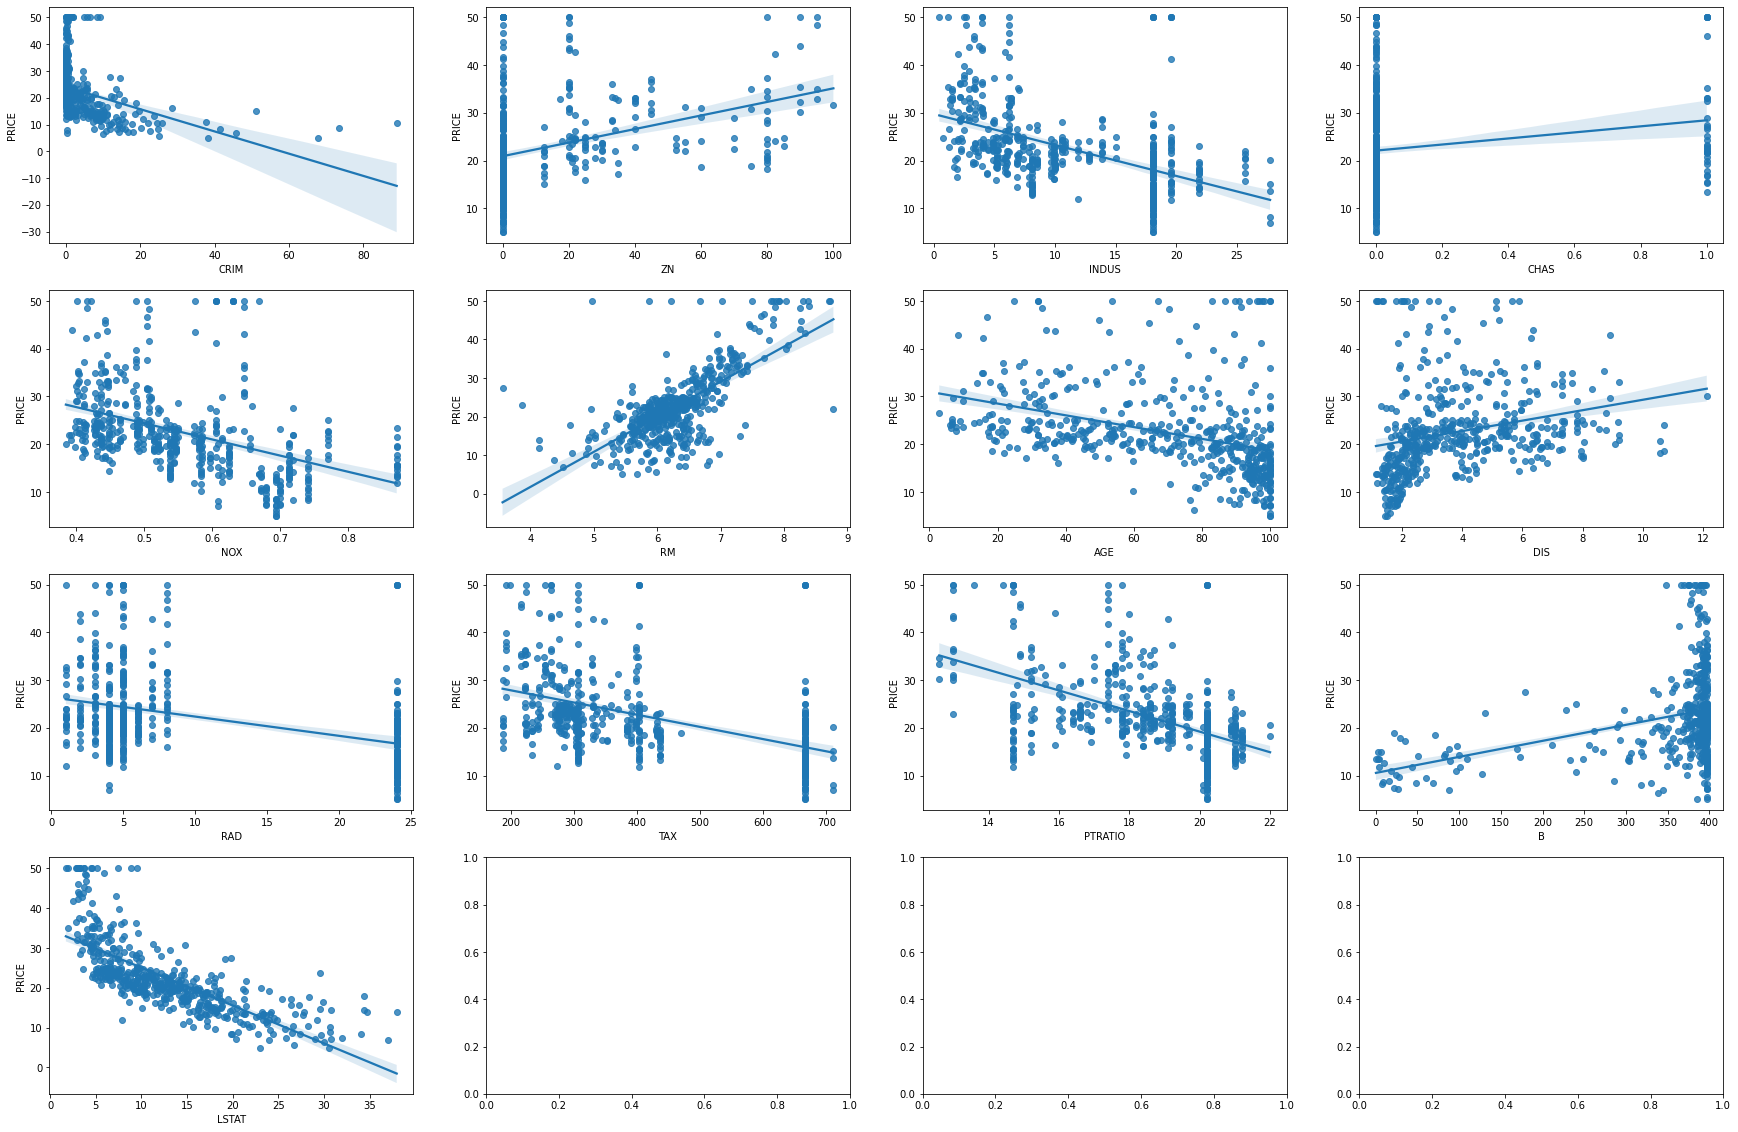

In [18]:
fig,axs = plt.subplots(figsize=(30,20),ncols=4,nrows=4)
lm_features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

for i,feature in enumerate(lm_features):
    row=int(i/4)    
    col=i%4

    sns.regplot(x=feature,y='PRICE',data=df_boston,ax=axs[row][col])


=> RM, LSTAT의 PRICE 영향도가 가장 두드러지게 나타남  
    - RM : Positive Linearity  
    - LSTAT : Negative Linearity  

-----

## PreProcessing

### Feature Scaling

### Train, Test set split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
y_target = df_boston['PRICE']
x_data = df_boston.drop(['PRICE'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_data,y_target,test_size=0.3,random_state=156)

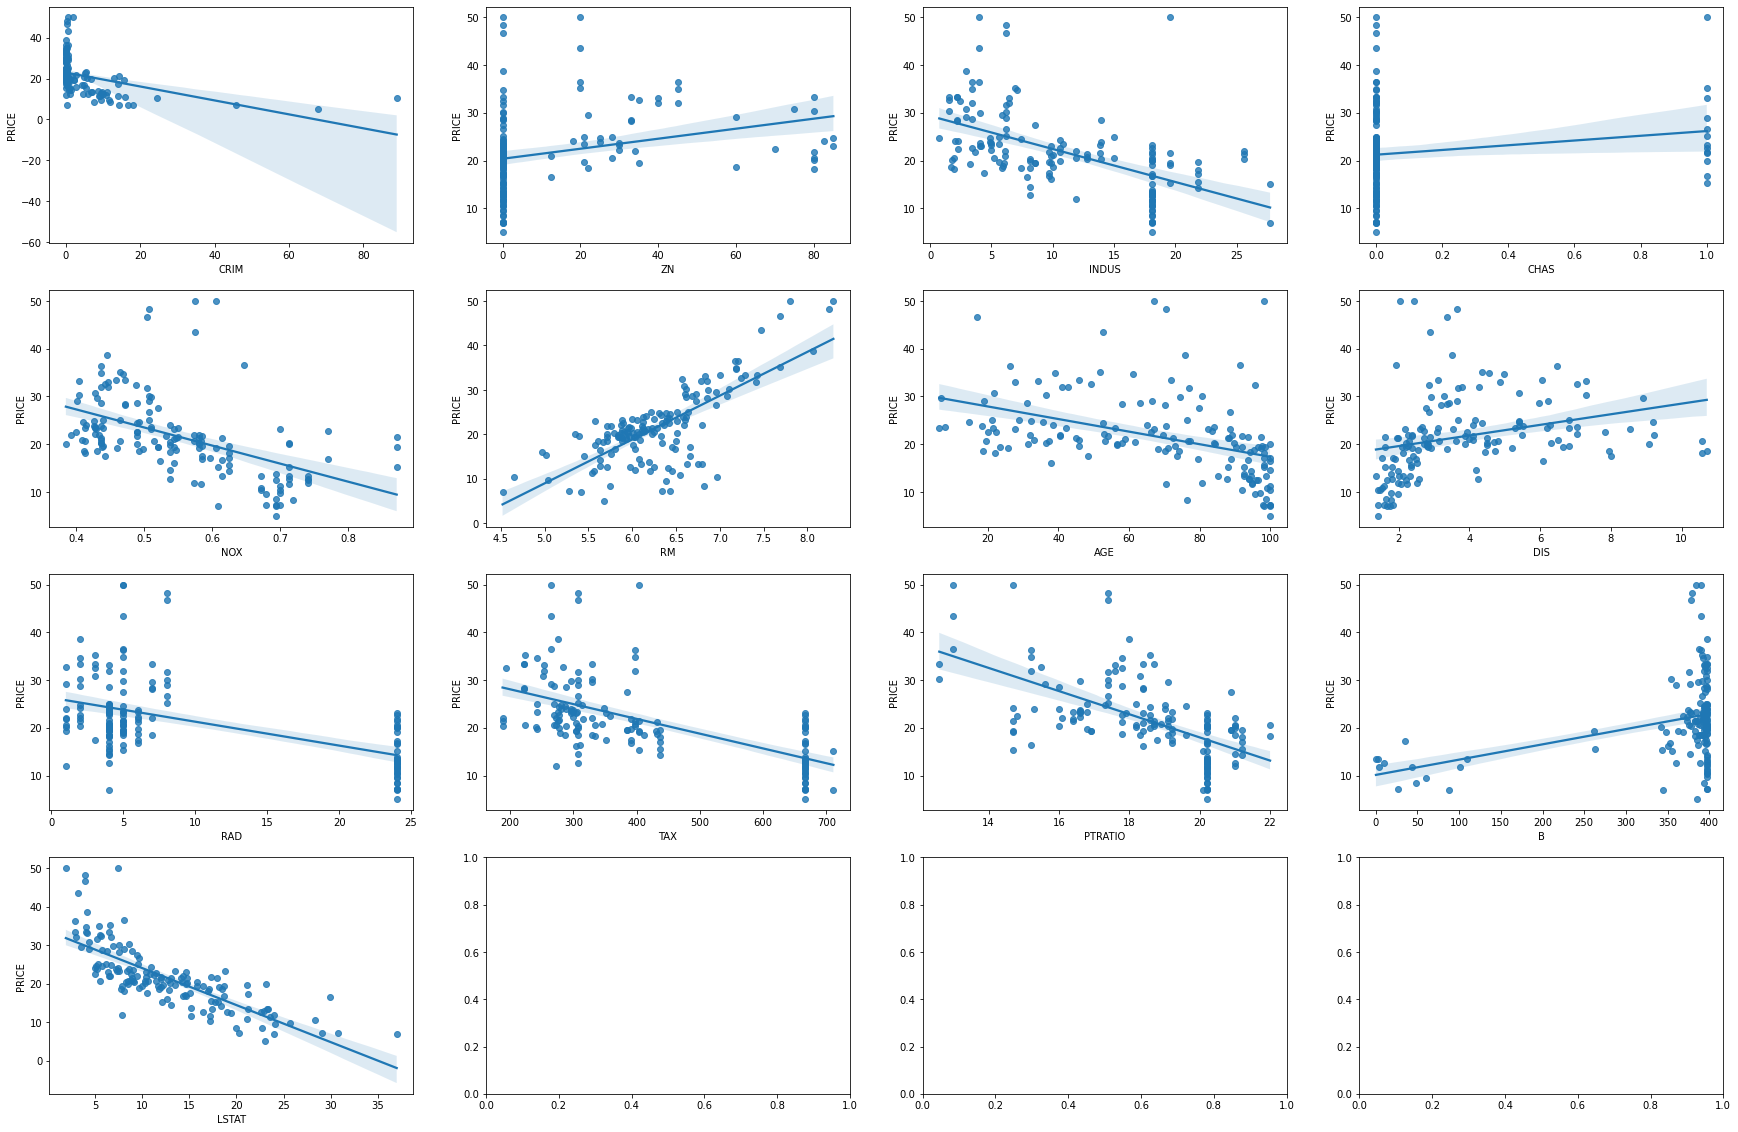

In [21]:
fig,axs = plt.subplots(figsize=(30,20),ncols=4,nrows=4)
lm_features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

for i,feature in enumerate(lm_features):
    row=int(i/4)    
    col=i%4

    sns.regplot(x=feature,y=y_test,data=x_test,ax=axs[row][col])

-----

## Prediction by Model

### Evaluation Metric : MSE, R2 Score, 5 fold average RMSE

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
def eval_models(answer, model):
    mse = mean_squared_error(answer, model)
    rmse = np.sqrt(mse)

    print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')
    print(f'Variance score : {r2_score(answer,model):.3f}')

In [28]:
from sklearn.model_selection import cross_val_score

def cross_val_score_model(model, data, label):
    neg_mse_scores = cross_val_score(model, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print(f'Negative MSE scores : {np.round(neg_mse_scores, 2)}')
    print(f'RMSE scores : {np.round(rmse_scores, 2)}')
    print(f'Avg RMSE : {avg_rmse:.3f}')

### Model : LinearRegression

In [25]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()
lr.fit(x_train, y_train)

lr_preds = lr.predict(x_test)

eval_models(y_test, lr_preds)

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [30]:
cross_val_score_model(lr, x_data, y_target)

Negative MSE scores : [-12.46 -26.05 -33.07 -80.76 -33.31]
RMSE scores : [3.53 5.1  5.75 8.99 5.77]
Avg RMSE : 5.829


In [32]:
print(f'intercept : {lr.intercept_}')
print(f'coefficients : {np.round(lr.coef_,3)}')

coeff = pd.Series(data=np.round(lr.coef_,3), index=x_data.columns)
coeff.sort_values(ascending=False)

intercept : 40.995595172164336
coefficients : [-1.1300e-01  6.6000e-02  3.4000e-02  3.0460e+00 -1.9796e+01  3.3550e+00
  6.0000e-03 -1.7420e+00  3.5600e-01 -1.4000e-02 -9.2000e-01  1.0000e-02
 -5.6600e-01]


RM          3.355
CHAS        3.046
RAD         0.356
ZN          0.066
INDUS       0.034
B           0.010
AGE         0.006
TAX        -0.014
CRIM       -0.113
LSTAT      -0.566
PTRATIO    -0.920
DIS        -1.742
NOX       -19.796
dtype: float64

=> 회귀 계수 : 기울기 계수

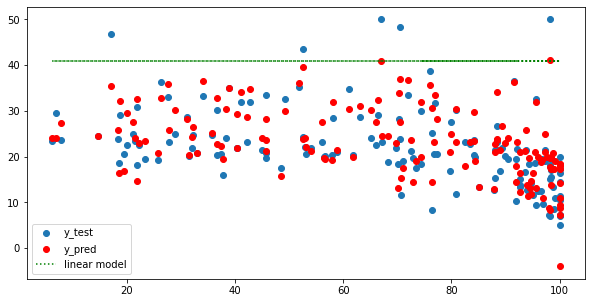

In [145]:
target = 'AGE'

plt.figure(figsize=(10,5))
plt.scatter(x_test[target], y_test, label='y_test')
plt.scatter(x_test[target], lr_preds, c='r', label='y_pred')
plt.plot(x_test[target], coeff[target]*x_test[target]+lr.intercept_, 'g:', label='linear model')
plt.legend(loc='best')
plt.show()

### Model : Polynomial Regression

In [121]:
from sklearn.preprocessing import PolynomialFeatures

In [122]:
poly_ftr_train = PolynomialFeatures(degree=2).fit_transform(x_train)

poly_lr = LinearRegression()
poly_lr.fit(poly_ftr_train, y_train)


poly_ftr_test = PolynomialFeatures(degree=2).fit_transform(x_test)
poly_lr_preds = poly_lr.predict(poly_ftr_test)

eval_models(y_test, poly_lr_preds)


MSE : 41.731, RMSE : 6.460
Variance score : 0.414


In [123]:
print(f'intercept : {poly_lr.intercept_}')
print(f'coefficients : {np.round(poly_lr.coef_,1)}')

# coeff = pd.Series(data=np.round(poly_lr.coef_,1), index=x_data.columns)
# coeff.sort_values(ascending=False)

intercept : 1090637192.0808947
coefficients : [-1.09063739e+09 -8.10000000e+00 -1.00000000e-01 -7.00000000e+00
  3.70000000e+01  2.53600000e+02  3.10000000e+01  1.20000000e+00
 -1.20000000e+01  3.10000000e+00 -1.00000000e-01  7.80000000e+00
  0.00000000e+00  5.00000000e-01 -0.00000000e+00  3.00000000e-01
  6.00000000e-01  1.90000000e+00 -1.00000000e-01 -0.00000000e+00
  0.00000000e+00 -1.00000000e-01  6.00000000e-01 -1.00000000e-01
  1.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -2.00000000e-01 -2.10000000e+00 -1.00000000e-01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -5.00000000e-01 -1.00000000e-01  2.00000000e-01  0.00000000e+00
  2.00000000e-01 -0.00000000e+00  0.00000000e+00 -1.00000000e-01
  0.00000000e+00 -0.00000000e+00  3.70000000e+01 -2.92000000e+01
 -6.00000000e+00 -0.00000000e+00  1.70000000e+00  0.00000000e+00
  0.00000000e+00 -2.00000000e+00  0.00000000

### Model : Regularized Linear Regression (Ridge, Lasso, Elastic)

Ridge : L2 Regularization

In [59]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [34]:
ridge = Ridge(alpha=100)

cross_val_score_model(ridge, x_data, y_target)

Negative MSE scores : [-12.82 -27.28 -34.68 -52.69 -22.05]
RMSE scores : [3.58 5.22 5.89 7.26 4.7 ]
Avg RMSE : 5.330


In [78]:
def cross_val_score_reg_model(model, data, label, alphas, verbose=True):

    if verbose : print(f'##### {model} #####')

    for alpha in alphas:
        if model == 'Ridge': reg_model = Ridge(alpha=alpha)
        elif model == 'Lasso': reg_model = Lasso(alpha=alpha)
        elif model == 'ElasticNet': reg_model = ElasticNet(alpha=alpha, l1_ratio=0.5)

        neg_mse_scores = cross_val_score(reg_model, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
        rmse_scores = np.sqrt(-1 * neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)

        print(f'alpha {alpha} 일 때 5 folds Average RMSE : {avg_rmse:1.3f}')


    fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
    coeff_df = pd.DataFrame()

    for pos, alpha in enumerate(alphas):
        if model == 'Ridge': reg_model = Ridge(alpha=alpha)
        elif model == 'Lasso': reg_model = Lasso(alpha=alpha)
        elif model == 'ElasticNet': reg_model = ElasticNet(alpha=alpha, l1_ratio=0.7)

        reg_model.fit(x_data, y_target)

        coeff = pd.Series(data=reg_model.coef_, index=x_data.columns)
        colname='alpha:'+str(alpha)
        coeff_df[colname] = coeff

        coeff = coeff.sort_values(ascending=False)
        axs[pos].set_title(colname)
        axs[pos].set_xlim(-3,6)
        sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

    plt.show()

    return coeff_df.sort_values(by=colname, ascending=False)


##### Ridge #####
alpha 10 일 때 5 folds Average RMSE : 5.518
alpha 100 일 때 5 folds Average RMSE : 5.330
alpha 150 일 때 5 folds Average RMSE : 5.328
alpha 200 일 때 5 folds Average RMSE : 5.341
alpha 500 일 때 5 folds Average RMSE : 5.450


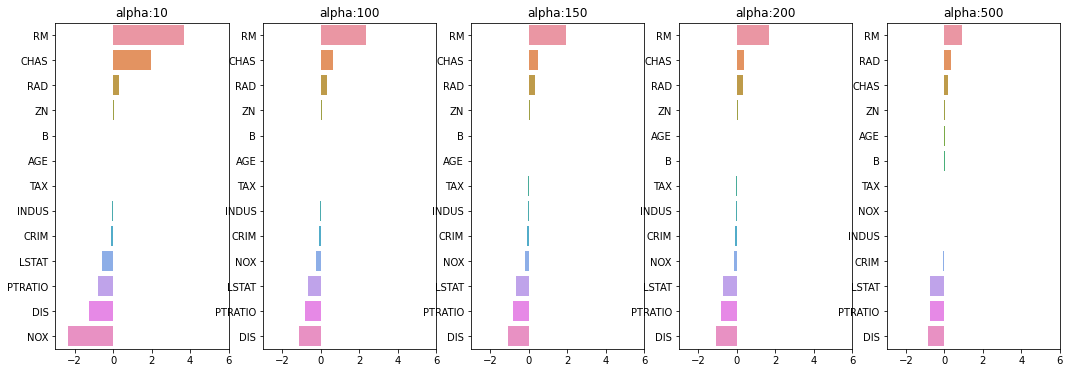

In [68]:
test_alphas = [10, 100, 150, 200, 500]


result_coeff = cross_val_score_reg_model('Ridge', x_data, y_target, test_alphas)

In [69]:
result_coeff

,alpha:10,alpha:100,alpha:150,alpha:200,alpha:500
RM,3.702272,2.334536,1.945427,1.672973,0.937658
RAD,0.279596,0.315358,0.323369,0.327895,0.329432
CHAS,1.952021,0.638335,0.472453,0.377547,0.179288
ZN,0.049579,0.054496,0.055245,0.055547,0.055153
AGE,-0.010707,0.001212,0.005691,0.009233,0.021679
B,0.010037,0.009393,0.009139,0.008949,0.008355
TAX,-0.013993,-0.015856,-0.016214,-0.016437,-0.016820
NOX,-2.371619,-0.262847,-0.171709,-0.125480,-0.042040
INDUS,-0.042962,-0.052826,-0.052757,-0.051809,-0.043565
CRIM,-0.101435,-0.102202,-0.101606,-0.100830,-0.096121


Lasso : L1 Regularization

In [54]:
from sklearn.linear_model import Lasso

Elastic : L1&L2 Regularization

##### Lasso #####
alpha 0.03 일 때 5 folds Average RMSE : 5.644
alpha 0.07 일 때 5 folds Average RMSE : 5.612
alpha 0.1 일 때 5 folds Average RMSE : 5.615
alpha 0.2 일 때 5 folds Average RMSE : 5.622
alpha 0.5 일 때 5 folds Average RMSE : 5.669


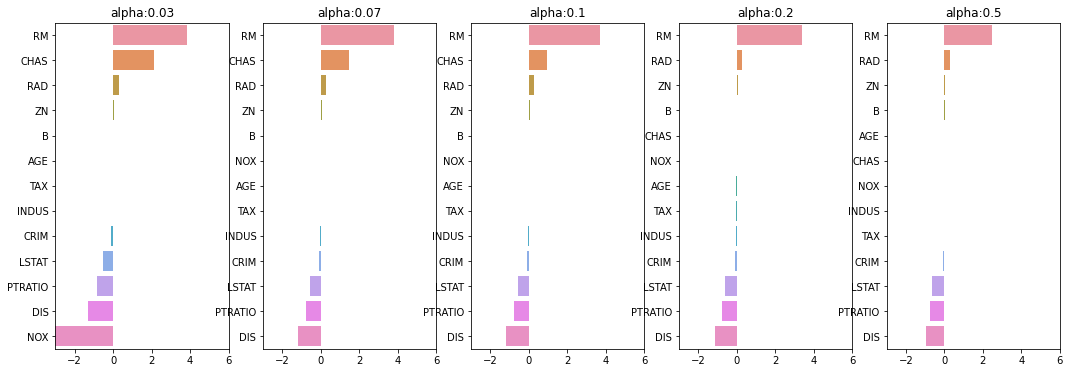

In [86]:
lasso_test_alphas = [0.03, 0.07, 0.1, 0.2, 0.5]

lasso_result_coeff = cross_val_score_reg_model('Lasso', x_data, y_target, lasso_test_alphas)

In [72]:
lasso_result_coeff

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,3.789725,3.703202,2.498212,0.949811,0.000000
DIS,-1.176583,-1.160538,-0.936605,-0.668790,-0.000000


=> alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀜. (NOX, CHAS, INDUS, ...)

##### ElasticNet #####
alpha 0.1 일 때 5 folds Average RMSE : 5.478
alpha 0.2 일 때 5 folds Average RMSE : 5.428
alpha 0.3 일 때 5 folds Average RMSE : 5.409
alpha 0.4 일 때 5 folds Average RMSE : 5.405
alpha 0.5 일 때 5 folds Average RMSE : 5.413


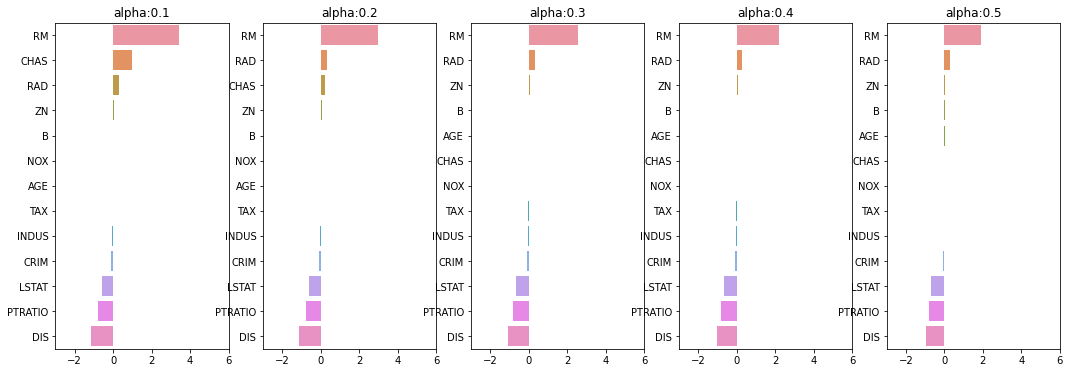

In [84]:
elastic_test_alphas = [0.1, 0.2, 0.3, 0.4, 0.5]

elastic_result_coeff = cross_val_score_reg_model('ElasticNet', x_data, y_target, elastic_test_alphas)

In [85]:
elastic_result_coeff

,alpha:0.1,alpha:0.2,alpha:0.3,alpha:0.4,alpha:0.5
RM,3.414154,2.937390,2.543862,2.206446,1.918419
RAD,0.283443,0.295189,0.299509,0.300750,0.300761
ZN,0.050617,0.051852,0.052363,0.052717,0.052878
B,0.010067,0.009837,0.009584,0.009333,0.009114
AGE,-0.008276,-0.002398,0.000862,0.004494,0.007760
CHAS,0.979706,0.190129,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
TAX,-0.014814,-0.015495,-0.015783,-0.015934,-0.016046
INDUS,-0.042719,-0.035162,-0.030639,-0.027228,-0.023252
CRIM,-0.099213,-0.097836,-0.095239,-0.092171,-0.089070


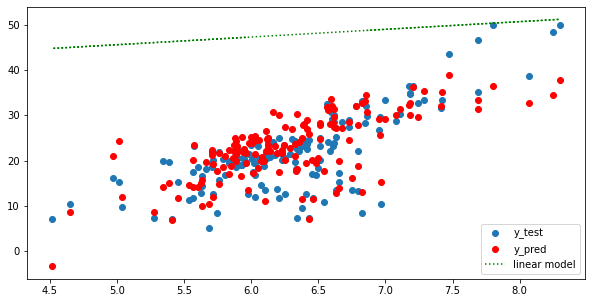

In [148]:
target = 'RM'

plt.figure(figsize=(10,5))
plt.scatter(x_test[target], y_test, label='y_test')
plt.scatter(x_test[target], elas_preds, c='r', label='y_pred')
plt.plot(x_test[target], elas_coeff[target]*x_test[target]+elas.intercept_, 'g:', label='linear model')
plt.legend(loc='best')
plt.show()